<a href="https://colab.research.google.com/github/XiaoxueRan/hku_phys3151_2022/blob/main/support-vector-machine/SVMIris_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!git clone https://github.com/XiaoxueRan/hku_phys3151_2022

Cloning into 'hku_phys3151_2022'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 69 (delta 24), reused 26 (delta 2), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [2]:
df = pd.read_csv('/content/hku_phys3151_2022/support-vector-machine/Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

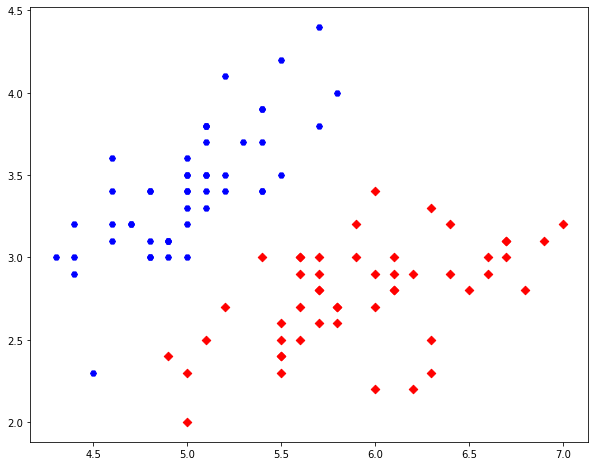

In [3]:
x = df['SepalLengthCm']
y = df['SepalWidthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red')
plt.show()

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

## Drop the other two features and extract the target values

df = df.drop(['PetalLengthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

## Shuffle and split the data into training and testing set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

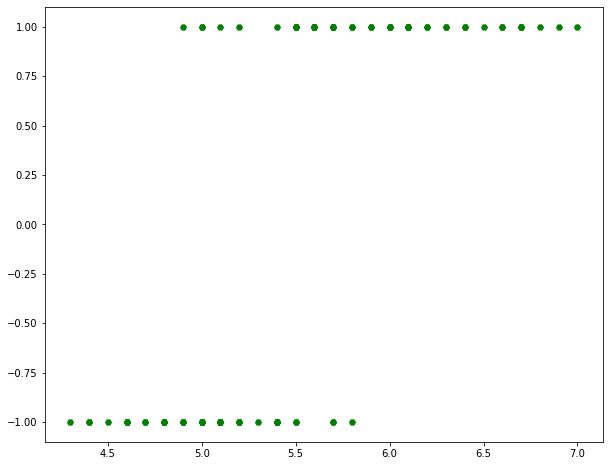

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(x_train[:,0], y_train, marker = 'H', color='Green')
plt.show()

In [6]:
# start the gradient descent

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f0 = np.ones((90,1))
train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))
w0 = np.zeros((90,1))

epochs = 1
alpha = 0.01

while (epochs < 30000):
    y = w1 * train_f1 + w2 * train_f2 - w0
    prod = y * y_train
 #   print(epochs)
    count = 0
    for val in prod:    
        if (val >= 1):
            cost = 0
            w0 = w0
            w1 = w1 - alpha * ( 1/epochs * w1)
            w2 = w2 - alpha * ( 1/epochs * w2)
        else:
            cost = 1 - val
            w0 = w0 - alpha * (train_f0[count] * y_train[count])
            w1 = w1 - alpha * (1/epochs * w1 - train_f1[count] * y_train[count])
            w2 = w2 - alpha * (1/epochs * w2 - train_f2[count] * y_train[count])
        count += 1
    epochs += 1

print(prod.shape)
print(prod)

(90, 1)
[[ 3.8820442 ]
 [ 6.96281593]
 [ 3.95068519]
 [ 4.4868493 ]
 [ 1.82796806]
 [ 6.06999013]
 [ 3.22136988]
 [ 5.85402261]
 [ 4.51649001]
 [ 5.69051212]
 [10.54075148]
 [ 8.98725136]
 [11.36493629]
 [ 2.51828309]
 [ 3.24759839]
 [ 5.88025112]
 [ 3.66607669]
 [ 3.22136988]
 [ 4.42162051]
 [ 5.85402261]
 [ 9.90630568]
 [ 1.50435927]
 [ 6.23350062]
 [ 5.72015283]
 [ 4.30052249]
 [ 7.43375124]
 [ 4.326751  ]
 [11.96974139]
 [ 5.31444631]
 [ 3.4373374 ]
 [ 3.38146818]
 [ 5.56941411]
 [ 5.6346429 ]
 [ 2.51828309]
 [ 7.37788203]
 [ 7.08391394]
 [ 4.11078349]
 [ 5.31444631]
 [ 5.40931581]
 [ 6.51469693]
 [ 3.31623939]
 [ 1.47813076]
 [ 3.03163088]
 [ 6.23008843]
 [ 4.6503598 ]
 [10.51111078]
 [ 5.0298378 ]
 [ 7.52862075]
 [ 9.81143617]
 [ 7.31265323]
 [ 4.395392  ]
 [ 5.82438191]
 [ 5.66428361]
 [ 5.59905481]
 [ 6.20385992]
 [ 1.38326126]
 [11.4598058 ]
 [ 1.05965247]
 [ 9.90630568]
 [ 4.70622901]
 [ 6.04376162]
 [12.53895841]
 [ 3.22136988]
 [ 7.33888174]
 [ 4.30052249]
 [ 3.31623939]
 [

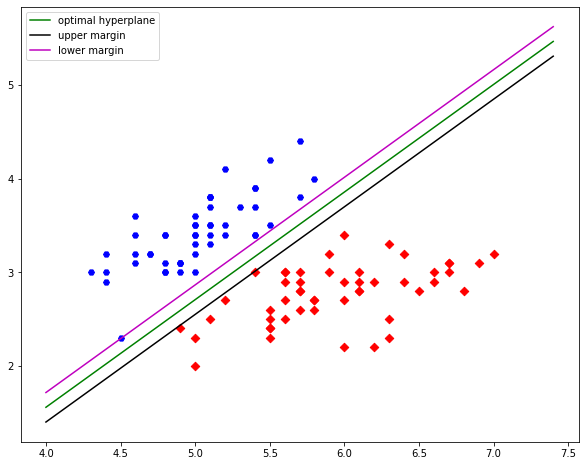

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red')
x = np.arange(4,7.5,0.1)
y = -(w1[-1]/w2[-1])*x + w0[-1]/w2[-1]
y1 = -(w1[-1]/w2[-1])*x + (1 + w0[-1])/w2[-1]
y2 = -(w1[-1]/w2[-1])*x + (-1 + w0[-1])/w2[-1]
plt.plot(x,y,label='optimal hyperplane', color = 'Green')
plt.plot(x,y1,label='upper margin', color = 'k')
plt.plot(x,y2,label='lower margin', color = 'm')
plt.legend()
plt.show()